### Importing Libraries

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import chi2_contingency as cst

### Code to display all rows and columns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0', 'ID', 'CollegeCityID'], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [7]:
df['DOL'].head()

0                present
1                present
2                present
3                present
4    2015-03-01 00:00:00
Name: DOL, dtype: object

In [8]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
2014-04-01 00:00:00      82
2015-02-01 00:00:00      69
2014-06-01 00:00:00      67
2014-09-01 00:00:00      64
2014-08-01 00:00:00      63
2014-12-01 00:00:00      53
2014-07-01 00:00:00      52
2014-05-01 00:00:00      52
2014-02-01 00:00:00      49
2014-01-01 00:00:00      46
2014-10-01 00:00:00      44
2014-03-01 00:00:00      39
2014-11-01 00:00:00      35
2013-07-01 00:00:00      31
2013-05-01 00:00:00      29
2015-07-01 00:00:00      26
2015-06-01 00:00:00      26
2013-12-01 00:00:00      25
2013-08-01 00:00:00      24
2013-09-01 00:00:00      23
2013-02-01 00:00:00      21
2013-01-01 00:00:00      20
2013-10-01 00:00:00      18
2013-03-01 00:00:00      18
2012-06-01 00:00:00      17
2013-06-01 00:00:00      17
2013-04-01 00:00:00      16
2012-08-01 00:00:00      14
2012-07-01 00:00:00      14
2013-11-01 00:00:00      13
2015-12-01 00:00:00 

In [9]:
df['DOL'] = df['DOL'].replace('present', datetime.today())

In [10]:
df['DOL'].value_counts()

2023-04-19 23:26:48.439300    1875
2015-04-01 00:00:00.000000     573
2015-03-01 00:00:00.000000     124
2015-05-01 00:00:00.000000     112
2015-01-01 00:00:00.000000      99
2014-04-01 00:00:00.000000      82
2015-02-01 00:00:00.000000      69
2014-06-01 00:00:00.000000      67
2014-09-01 00:00:00.000000      64
2014-08-01 00:00:00.000000      63
2014-12-01 00:00:00.000000      53
2014-07-01 00:00:00.000000      52
2014-05-01 00:00:00.000000      52
2014-02-01 00:00:00.000000      49
2014-01-01 00:00:00.000000      46
2014-10-01 00:00:00.000000      44
2014-03-01 00:00:00.000000      39
2014-11-01 00:00:00.000000      35
2013-07-01 00:00:00.000000      31
2013-05-01 00:00:00.000000      29
2015-06-01 00:00:00.000000      26
2015-07-01 00:00:00.000000      26
2013-12-01 00:00:00.000000      25
2013-08-01 00:00:00.000000      24
2013-09-01 00:00:00.000000      23
2013-02-01 00:00:00.000000      21
2013-01-01 00:00:00.000000      20
2013-03-01 00:00:00.000000      18
2013-10-01 00:00:00.

In [11]:
df['DOL'].head()

0   2023-04-19 23:26:48.439300
1   2023-04-19 23:26:48.439300
2   2023-04-19 23:26:48.439300
3   2023-04-19 23:26:48.439300
4   2015-03-01 00:00:00.000000
Name: DOL, dtype: datetime64[ns]

In [12]:
df['DOJ'].head()

0   2012-06-01
1   2013-09-01
2   2014-06-01
3   2011-07-01
4   2014-03-01
Name: DOJ, dtype: datetime64[ns]

In [13]:
df['Service_Period'] = df['DOL'] - df['DOJ']
df['Service_Period'].head()

0   3974 days 23:26:48.439300
1   3517 days 23:26:48.439300
2   3244 days 23:26:48.439300
3   4310 days 23:26:48.439300
4           365 days 00:00:00
Name: Service_Period, dtype: timedelta64[ns]

In [14]:
df['Service_Period'].head()

0   3974 days 23:26:48.439300
1   3517 days 23:26:48.439300
2   3244 days 23:26:48.439300
3   4310 days 23:26:48.439300
4           365 days 00:00:00
Name: Service_Period, dtype: timedelta64[ns]

In [15]:
df['DOL'] = pd.to_datetime(df['DOL']).dt.date
df['DOJ'] = pd.to_datetime(df['DOJ'])

In [16]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Service_Period
0,420000,2012-06-01,2023-04-19,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,3974 days 23:26:48.439300
1,500000,2013-09-01,2023-04-19,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,3517 days 23:26:48.439300
2,325000,2014-06-01,2023-04-19,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,3244 days 23:26:48.439300
3,1100000,2011-07-01,2023-04-19,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4310 days 23:26:48.439300
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days 00:00:00


In [17]:
df['DOJ'].head()

0   2012-06-01
1   2013-09-01
2   2014-06-01
3   2011-07-01
4   2014-03-01
Name: DOJ, dtype: datetime64[ns]

In [18]:
df['DOL'].head()

0    2023-04-19
1    2023-04-19
2    2023-04-19
3    2023-04-19
4    2015-03-01
Name: DOL, dtype: object

In [19]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [20]:
df['Service_Period'] = df['DOL'] - df['DOJ']

In [21]:
df['Service_Period'].head()

0   3974 days
1   3517 days
2   3244 days
3   4310 days
4    365 days
Name: Service_Period, dtype: timedelta64[ns]

In [22]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Service_Period
0,420000,2012-06-01,2023-04-19,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,3974 days
1,500000,2013-09-01,2023-04-19,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,3517 days
2,325000,2014-06-01,2023-04-19,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,3244 days
3,1100000,2011-07-01,2023-04-19,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4310 days
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,365 days


In [23]:
df['10board'] = df['10board'].replace(0, 'cbse')

### Processing Service Period

In [24]:
df['Service_Period'] = df['Service_Period'].apply(lambda x: x.days / 365.2425)
df['Service_Period'] = df['Service_Period'].astype(int)
df['Service_Period']

0       10
1        9
2        8
3       11
4        0
5        8
6        0
7        0
8        9
9        8
10       4
11       3
12       9
13       9
14       9
15       9
16       8
17       1
18       0
19       8
20       1
21       1
22       1
23       0
24       0
25      10
26       2
27       0
28       0
29       0
30      11
31       0
32       9
33       8
34       8
35       9
36      10
37       4
38       9
39       0
40       0
41       0
42       8
43       0
44       2
45       0
46       1
47       0
48       9
49       2
50       1
51       8
52       8
53       8
54       8
55       8
56      10
57      11
58       0
59       3
60       9
61       0
62       8
63       0
64       2
65       0
66       2
67       0
68       1
69       7
70       9
71       8
72       0
73       0
74       0
75       8
76      10
77       8
78       0
79       0
80       8
81       0
82       0
83       0
84      11
85       7
86       1
87       0
88       8
89      10
90       9

In [25]:
df['10board'].value_counts()

cbse                                                                        1745
state board                                                                 1164
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
sslc                                                                          16
wbbse                                                                         16
central board of secondary e

In [26]:
df['10board'].nunique()

274

In [27]:
df['Service_Period'].head()

0    10
1     9
2     8
3    11
4     0
Name: Service_Period, dtype: int32

In [28]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Service_Period
0,420000,2012-06-01,2023-04-19,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,10
1,500000,2013-09-01,2023-04-19,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,9
2,325000,2014-06-01,2023-04-19,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,8
3,1100000,2011-07-01,2023-04-19,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


In [29]:
df.drop(['DOJ', 'DOL'], inplace = True, axis = 1)

In [30]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage',
       '10board', '12graduation', '12percentage', '12board', 'CollegeID',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Service_Period'],
      dtype='object')

### Processing Age column

In [31]:
df['Age'] = datetime.today() - df['DOB']
df['Age'] = df['Age'].apply(lambda x: x.days / 365.2425)
df.Age = df.Age.round(0)
df.Age = df.Age.astype(int)

In [32]:
df.Age.head()

0    33
1    34
2    31
3    33
4    32
Name: Age, dtype: int32

In [33]:
df.drop(columns = ['DOB', 'CollegeID'], inplace = True)

In [34]:
df.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Service_Period,Age
0,420000,senior quality engineer,Bangalore,f,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,10,33
1,500000,assistant manager,Indore,m,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,9,34
2,325000,systems engineer,Chennai,f,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,8,31
3,1100000,senior software engineer,Gurgaon,m,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11,33
4,200000,get,Manesar,m,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,32


In [35]:
df.CollegeTier.value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

### Graduation Year

In [36]:
df.GraduationYear.value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [37]:
df['GraduationYear'] = df['GraduationYear'].replace(0, 2013)

In [38]:
df.GraduationYear.value_counts()

2013    1182
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

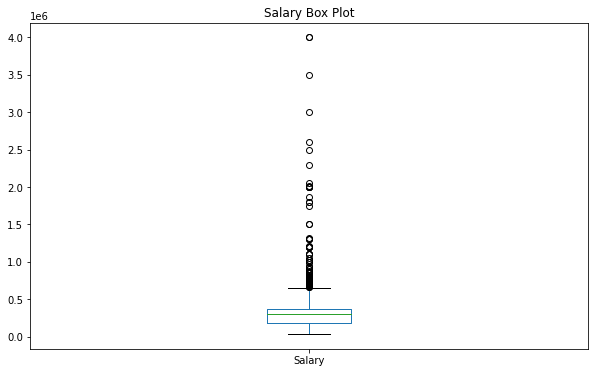

In [39]:
plt.figure(figsize = (10, 6))
df['Salary'].plot(kind = 'box')
plt.title('Salary Box Plot')
plt.show()

### 10th Percentage

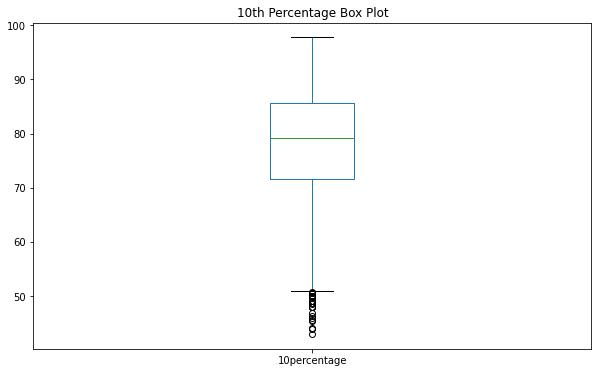

In [40]:
plt.figure(figsize = (10, 6))
df['10percentage'].plot(kind = 'box')
plt.title('10th Percentage Box Plot')
plt.show()

### 12th Percentage

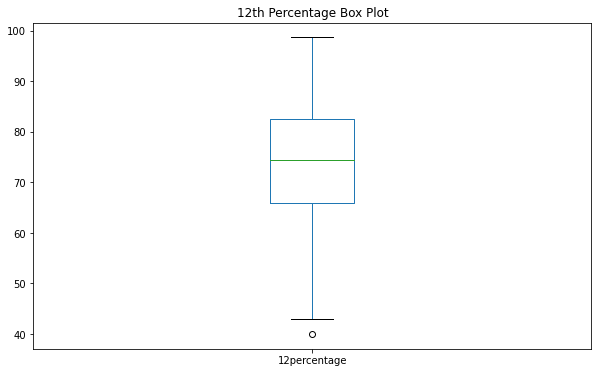

In [41]:
plt.figure(figsize = (10, 6))
df['12percentage'].plot(kind = 'box')
plt.title('12th Percentage Box Plot')
plt.show()

### College GPA

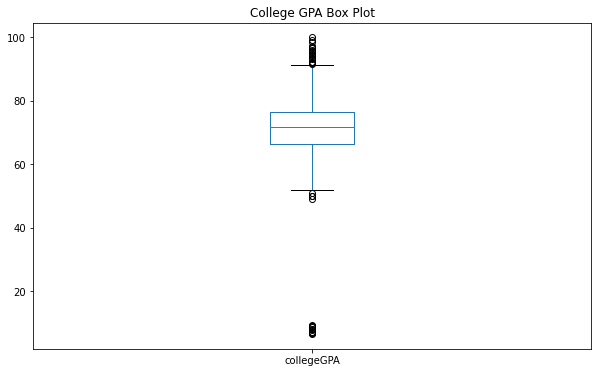

In [42]:
plt.figure(figsize = (10, 6))
df['collegeGPA'].plot(kind = 'box')
plt.title('College GPA Box Plot')
plt.show()

### English

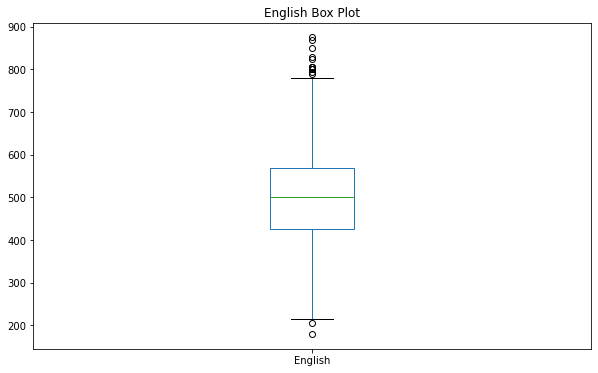

In [43]:
plt.figure(figsize = (10, 6))
df['English'].plot(kind = 'box')
plt.title('English Box Plot')
plt.show()

### Logical

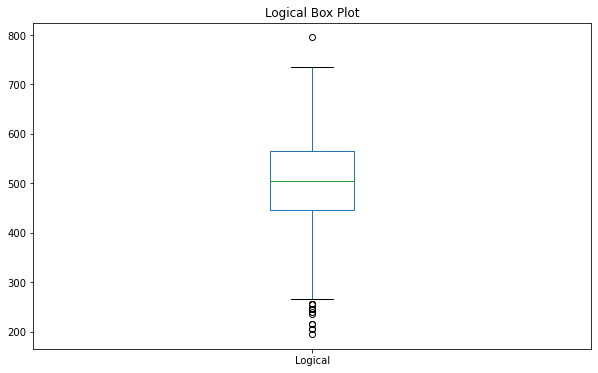

In [44]:
plt.figure(figsize = (10, 6))
df['Logical'].plot(kind = 'box')
plt.title('Logical Box Plot')
plt.show()

### Quant

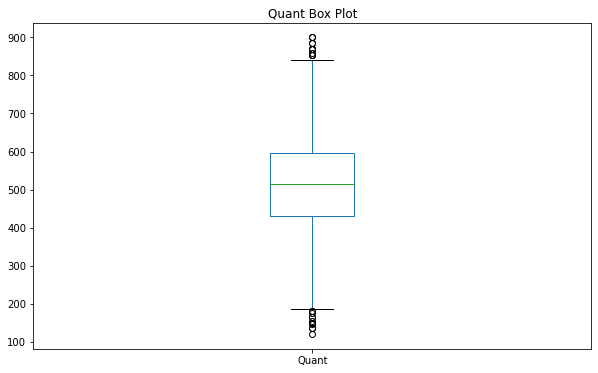

In [45]:
plt.figure(figsize = (10, 6))
df['Quant'].plot(kind = 'box')
plt.title('Quant Box Plot')
plt.show()

### Domain

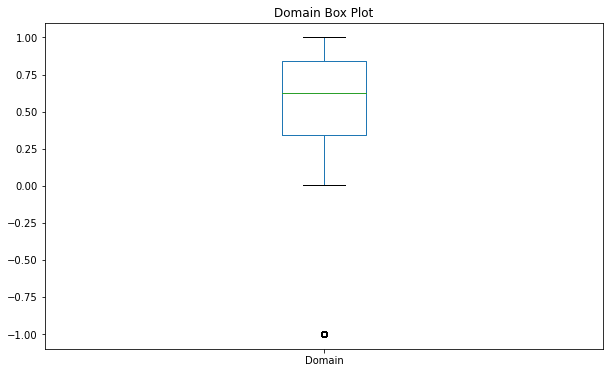

In [46]:
plt.figure(figsize = (10, 6))
df['Domain'].plot(kind = 'box')
plt.title('Domain Box Plot')
plt.show()

### Computer Programming

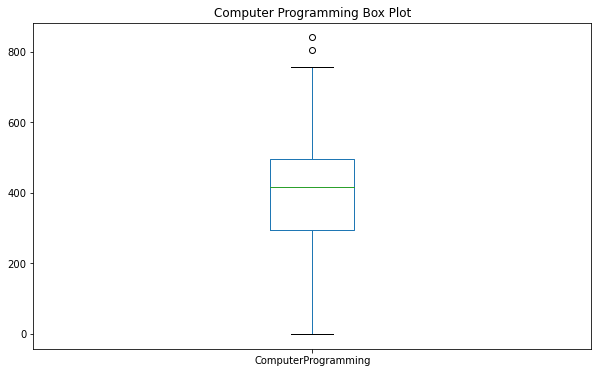

In [47]:
plt.figure(figsize = (10, 6))
df['ComputerProgramming'].plot(kind = 'box')
plt.title('Computer Programming Box Plot')
plt.show()

### Age

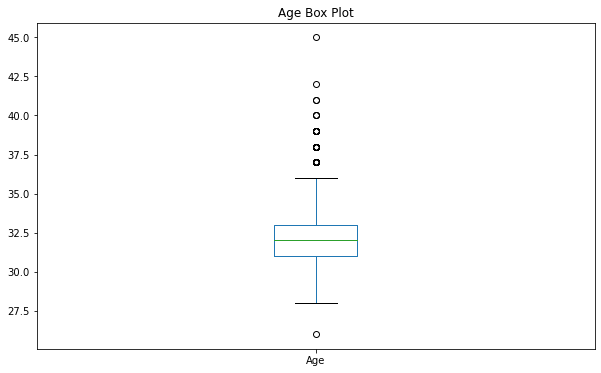

In [48]:
plt.figure(figsize = (10, 6))
df['Age'].plot(kind = 'box')
plt.title('Age Box Plot')
plt.show()

### Service Period

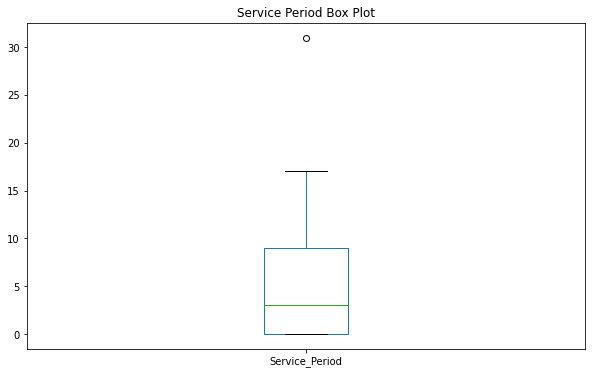

In [49]:
plt.figure(figsize = (10, 6))
df['Service_Period'].plot(kind = 'box')
plt.title('Service Period Box Plot')
plt.show()

### Uni-Variate Analysis on Salary

In [50]:
print('25th Quantile of Salary:', df.Salary.quantile(0.25).astype(int))
print('50th Quantile of Salary:', df.Salary.quantile(0.50).astype(int))
print('75th Quantile of Salary:', df.Salary.quantile(0.75).astype(int))
print('95th Quantile of Salary:', df.Salary.quantile(0.95).astype(int))

25th Quantile of Salary: 180000
50th Quantile of Salary: 300000
75th Quantile of Salary: 370000
95th Quantile of Salary: 570000


### Uni-Variate Analysis on 10th Percentage

In [51]:
print('25th Quantile of 10th Percent:', df['10percentage'].quantile(0.25).astype(int))
print('50th Quantile of 10th Percent:', df['10percentage'].quantile(0.50).astype(int))
print('75th Quantile of 10th Percent:', df['10percentage'].quantile(0.75).astype(int))
print('95th Quantile of 10th Percent:', df['10percentage'].quantile(0.95).astype(int))

25th Quantile of 10th Percent: 71
50th Quantile of 10th Percent: 79
75th Quantile of 10th Percent: 85
95th Quantile of 10th Percent: 91


### Uni-Variate Analysis on 12th Percentage

In [52]:
print('25th Quantile of 12th Percent:', df['12percentage'].quantile(0.25).astype(int))
print('50th Quantile of 12th Percent:', df['12percentage'].quantile(0.50).astype(int))
print('75th Quantile of 12th Percent:', df['12percentage'].quantile(0.75).astype(int))
print('95th Quantile of 12th Percent:', df['12percentage'].quantile(0.95).astype(int))

25th Quantile of 12th Percent: 66
50th Quantile of 12th Percent: 74
75th Quantile of 12th Percent: 82
95th Quantile of 12th Percent: 92


### Uni-Variate Analysis on College GPA

In [53]:
print('25th Quantile of College GPA:', df['collegeGPA'].quantile(0.25).astype(int))
print('50th Quantile of College GPA:', df['collegeGPA'].quantile(0.50).astype(int))
print('75th Quantile of College GPA:', df['collegeGPA'].quantile(0.75).astype(int))
print('95th Quantile of College GPA:', df['collegeGPA'].quantile(0.95).astype(int))

25th Quantile of College GPA: 66
50th Quantile of College GPA: 71
75th Quantile of College GPA: 76
95th Quantile of College GPA: 84


### Uni-Variate Analysis on Service Period

In [54]:
print('25th Quantile of Service_Period:', df['Service_Period'].quantile(0.25).astype(int))
print('50th Quantile of Service_Period:', df['Service_Period'].quantile(0.50).astype(int))
print('75th Quantile of Service_Period:', df['Service_Period'].quantile(0.75).astype(int))
print('95th Quantile of Service_Period:', df['Service_Period'].quantile(0.95).astype(int))

25th Quantile of Service_Period: 0
50th Quantile of Service_Period: 3
75th Quantile of Service_Period: 9
95th Quantile of Service_Period: 11


### Uni-Variate Analysis on Age

In [55]:
print('25th Quantile of Age:', df['Age'].quantile(0.25).astype(int))
print('50th Quantile of Age:', df['Age'].quantile(0.50).astype(int))
print('75th Quantile of Age:', df['Age'].quantile(0.75).astype(int))
print('95th Quantile of Age:', df['Age'].quantile(0.95).astype(int))

25th Quantile of Age: 31
50th Quantile of Age: 32
75th Quantile of Age: 33
95th Quantile of Age: 35


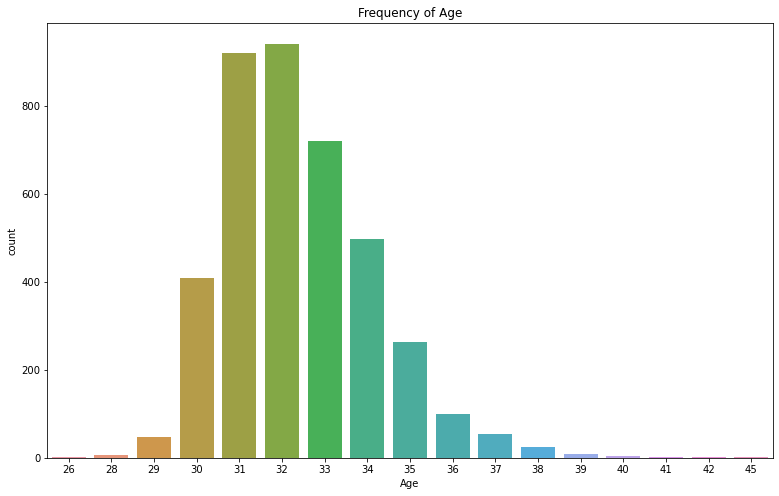

In [56]:
plt.figure(figsize = (13, 8))
sns.countplot(x = df.Age)
plt.title('Frequency of Age')
plt.show()

### 941 people of age 32 are present in the dataset
### 920 people of age 31 are present in the dataset
### 1 person of age 45 is present in the dataset

### Designation

In [57]:
df.Designation.value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
data analyst                               49
business analyst                           49
engineer                                   47
associate software engineer                46
android developer                          46
programmer                        

In [58]:
l = []
for i in df['Designation']:
    if('senior' in i):
        l.append('senior')
    elif('trainee'in i):
        l.append('trainee')
    elif('engineer' in i):
        l.append('engineer')
    elif('associate' in i):
        l.append('associate')
    elif('developer' in i):
        l.append('developer')
    elif('manager' in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')
        
df['Designation'] = l

In [59]:
df.Designation.value_counts()

engineer      1957
developer      668
analyst        402
others         398
senior         183
manager        123
trainee         97
associate       66
executive       62
designer        23
consultant      19
Name: Designation, dtype: int64

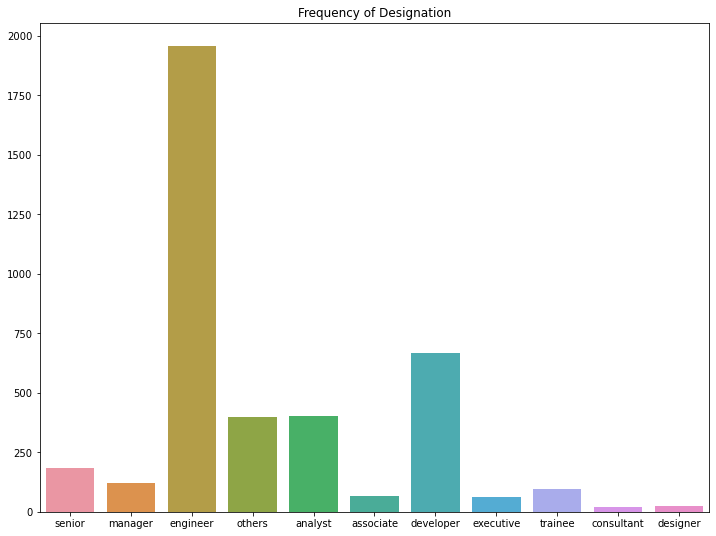

In [60]:
plt.figure(figsize = (12, 9))
sns.countplot(x = df.Designation)
plt.title('Frequency of Designation')
plt.xlabel('')
plt.ylabel('')
plt.show()

### 1957 people are engineer by profession
### Only 19 people are consultant by profession

### 10th Board

In [61]:
lst = []
for i in df['10board']:
    if isinstance(i, str):
        if 'icse' in i.lower():
            lst.append('ICSE')
        elif 'cbse' in i.lower() or 'central board of secondary education' in i.lower() or 'delhi' in i.lower() or 'cbsc' in i.lower():
            lst.append('CBSE')
        else:
            lst.append('State Board')
    else:
        lst.append('State Board')
    
df['10board'] = lst

In [62]:
df['10board'].value_counts()

State Board    1948
CBSE           1766
ICSE            284
Name: 10board, dtype: int64

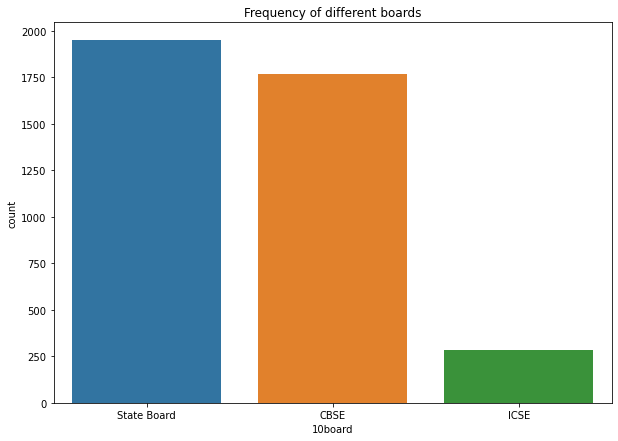

In [63]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['10board'])
plt.title('Frequency of different boards')
plt.show()

### 11948 people had studied their 10th class from state board
### 1766 people had studied their 10th class from cbse board
### 284 people had studied their 10th class from cbse board

### Gender

In [64]:
df['Gender'] = df['Gender'].apply(lambda x: x.replace('m', 'Male').replace('f', 'Female'))

In [65]:
df['Gender']

0       Female
1         Male
2       Female
3         Male
4         Male
5         Male
6         Male
7         Male
8         Male
9         Male
10        Male
11        Male
12        Male
13        Male
14        Male
15      Female
16        Male
17        Male
18        Male
19      Female
20      Female
21      Female
22        Male
23        Male
24        Male
25      Female
26        Male
27        Male
28        Male
29        Male
30        Male
31        Male
32      Female
33        Male
34      Female
35      Female
36      Female
37        Male
38        Male
39        Male
40        Male
41        Male
42        Male
43        Male
44      Female
45        Male
46      Female
47        Male
48        Male
49        Male
50      Female
51        Male
52        Male
53        Male
54      Female
55        Male
56      Female
57      Female
58        Male
59        Male
60      Female
61        Male
62      Female
63        Male
64        Male
65        Male
66        

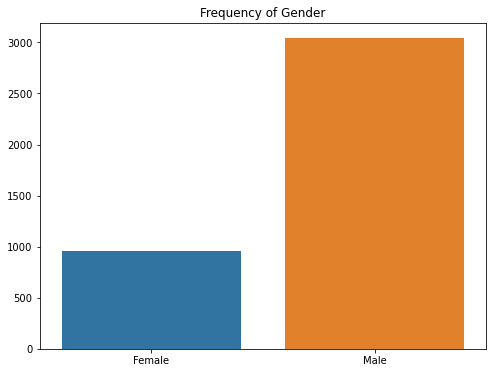

In [66]:
plt.figure(figsize = (8, 6))
sns.countplot(x = df['Gender'])
plt.title('Frequency of Gender')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Males are more in quantity than females in the dataset

In [67]:
df['12graduation']

0       2007
1       2007
2       2010
3       2007
4       2008
5       2010
6       2010
7       2010
8       2009
9       2010
10      2006
11      2007
12      2008
13      2008
14      2008
15      2008
16      2010
17      2006
18      2008
19      2008
20      2006
21      2007
22      2009
23      2006
24      2010
25      2008
26      2006
27      2009
28      2011
29      2010
30      2007
31      2010
32      2009
33      2010
34      2009
35      2008
36      2009
37      2010
38      2007
39      2008
40      2007
41      2009
42      2010
43      2010
44      2007
45      2010
46      2008
47      2008
48      2009
49      2007
50      2005
51      2009
52      2010
53      2010
54      2008
55      2010
56      2006
57      2007
58      2008
59      1995
60      2009
61      2010
62      2009
63      2008
64      2004
65      2009
66      2006
67      2010
68      2006
69      2011
70      2009
71      2008
72      2010
73      2009
74      2009
75      2010
76      2008

In [68]:
df['GraduationYear'].value_counts()

2013    1182
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

### Graduation Year

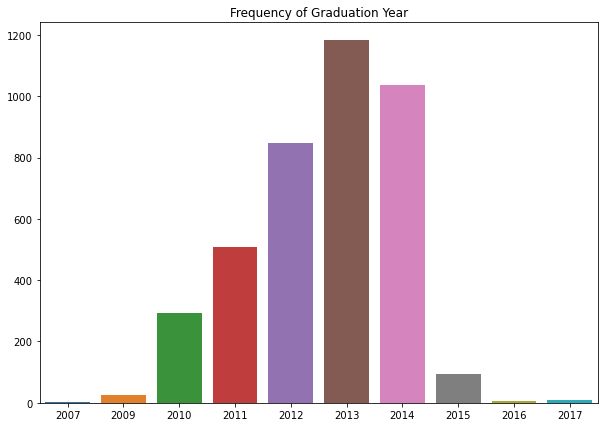

In [69]:
plt.figure(figsize = (10, 7))
sns.countplot(x = df['GraduationYear'])
plt.title('Frequency of Graduation Year')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Almost 1200 people graduated in the year 2013 followed by 2014.

### Uni-Variate Analysis on English Feature

<AxesSubplot:>

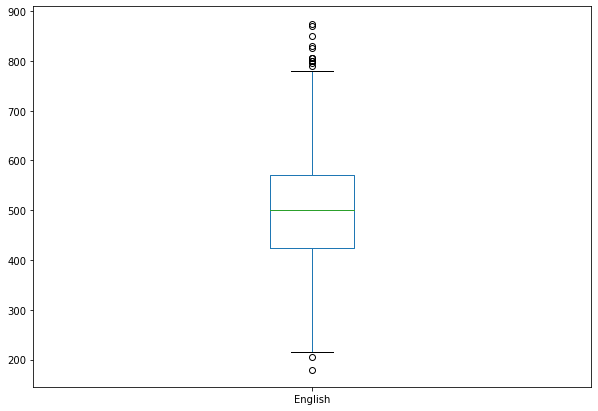

In [70]:
df.English.plot(kind = 'box', figsize = (10, 7))

In [71]:
print('Minimum           :', df.English.min())
print('Maximum           :', df.English.max())
print('Mean              :', round(df.English.mean(), 1))
print('Standard Deviation:', round(df.English.std(), 1))
print('Median: ', df.English.median())

Minimum           : 180
Maximum           : 875
Mean              : 501.6
Standard Deviation: 104.9
Median:  500.0


In [72]:
print("25 Percentile of English Score:",round(df['English'].quantile(0.25)))
print("50 Percentile of English Score:",round(df['English'].quantile(0.50)))
print("75 Percentile of English Score:",round(df['English'].quantile(0.75)))
print("90 Percentile of English Score:",round(df['English'].quantile(0.90)))

25 Percentile of English Score: 425
50 Percentile of English Score: 500
75 Percentile of English Score: 570
90 Percentile of English Score: 640


### Uni-Variate Analysis on English Feature

<AxesSubplot:>

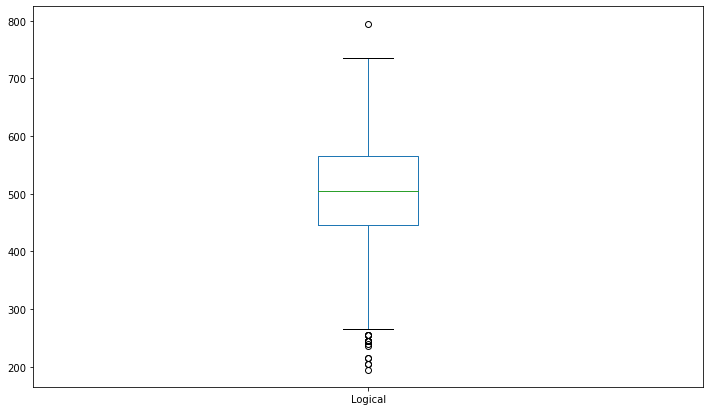

In [73]:
df.Logical.plot(kind = 'box', figsize = (12, 7))

In [74]:
print('Minimum           :', df.Logical.min())
print('Maximum           :', df.Logical.max())
print('Mean              :', round(df.Logical.mean(), 1))
print('Standard Deviation:', round(df.Logical.std(), 1))
print('Median            :', df.Logical.median())

Minimum           : 195
Maximum           : 795
Mean              : 501.6
Standard Deviation: 86.8
Median            : 505.0


In [75]:
print("25 Percentile of Logical Score:",round(df['Logical'].quantile(0.25)))
print("50 Percentile of Logical Score:",round(df['Logical'].quantile(0.50)))
print("75 Percentile of Logical Score:",round(df['Logical'].quantile(0.75)))
print("90 Percentile of Logical Score:",round(df['Logical'].quantile(0.90)))

25 Percentile of Logical Score: 445
50 Percentile of Logical Score: 505
75 Percentile of Logical Score: 565
90 Percentile of Logical Score: 610


### Uni-Variate Analysis on Quant Feature

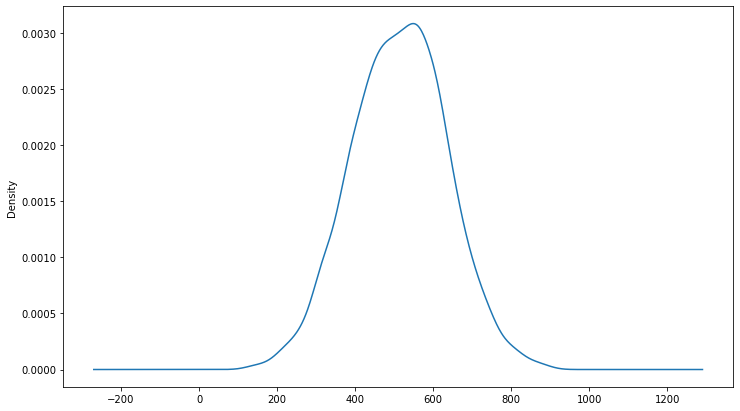

In [76]:
df.Quant.plot(kind = 'kde', figsize = (12, 7))
plt.show()

#### Quant follows Normal Distribution

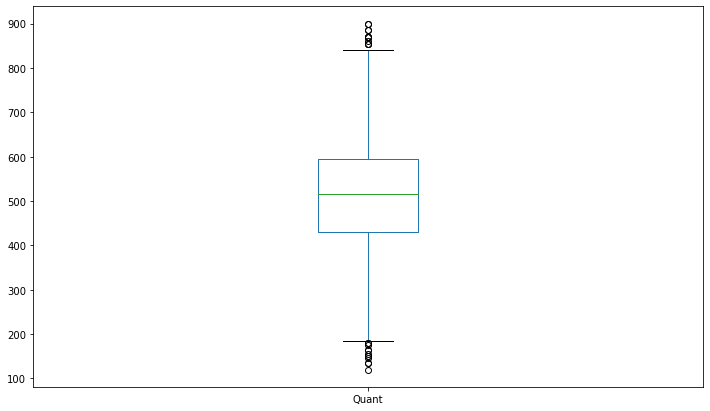

In [77]:
df.Quant.plot(kind = 'box', figsize = (12, 7))
plt.show()

In [78]:
print('Minimum           :', df.Quant.min())
print('Maximum           :', df.Quant.max())
print('Mean              :', round(df.Quant.mean(), 1))
print('Standard Deviation:', round(df.Quant.std(), 1))
print('Median            :', df.Quant.median())

Minimum           : 120
Maximum           : 900
Mean              : 513.4
Standard Deviation: 122.3
Median            : 515.0


In [79]:
print("25 Percentile of Quant Score:",round(df['Quant'].quantile(0.25)))
print("50 Percentile of Quant Score:",round(df['Quant'].quantile(0.50)))
print("75 Percentile of Quant Score:",round(df['Quant'].quantile(0.75)))
print("90 Percentile of Quant Score:",round(df['Quant'].quantile(0.90)))

25 Percentile of Quant Score: 430
50 Percentile of Quant Score: 515
75 Percentile of Quant Score: 595
90 Percentile of Quant Score: 665


### Uni-Variate Analysis on Computer Programming Feature

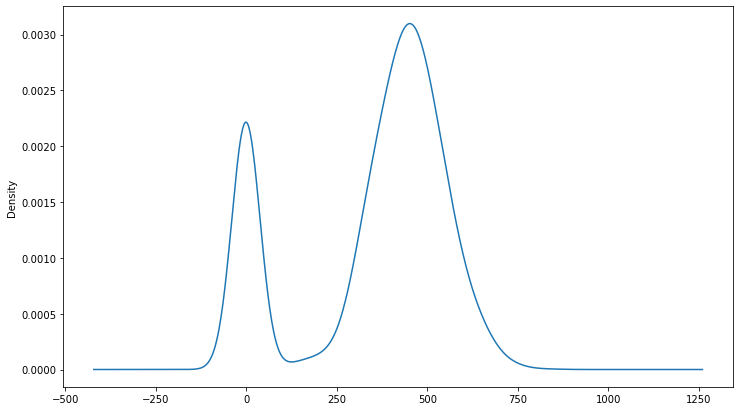

In [80]:
df.ComputerProgramming.plot(kind='kde', figsize=(12, 7))
plt.show()

#### Computer Programming follows Bi-Normal Distribution

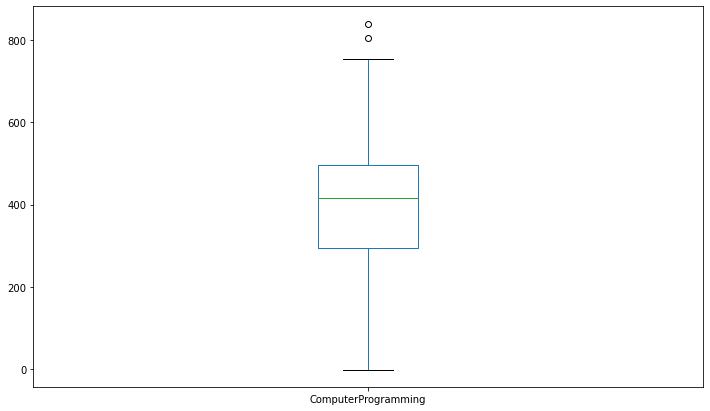

In [81]:
df.ComputerProgramming.plot(kind = 'box', figsize = (12, 7))
plt.show()

In [82]:
print("Minimum           :", df['ComputerProgramming'].min())
print("Maximum           :", df['ComputerProgramming'].max())
print("Mean              :", round(df['ComputerProgramming'].mean()))
print("Median            :", round(df['ComputerProgramming'].median()))
print("Standard Deviation:", round(df['ComputerProgramming'].std()))

Minimum           : -1
Maximum           : 840
Mean              : 353
Median            : 415
Standard Deviation: 205


### College City Tier

In [83]:
df.CollegeCityTier.value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

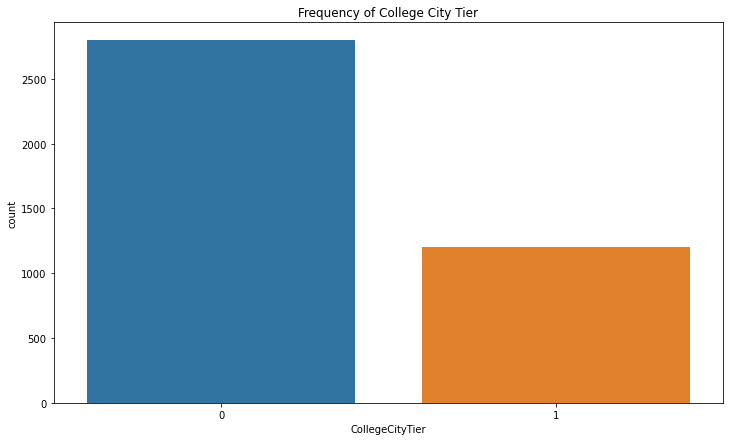

In [84]:
plt.figure(figsize = (12, 7))
sns.countplot(x = df.CollegeCityTier)
plt.title('Frequency of College City Tier')
plt.show()

### College State

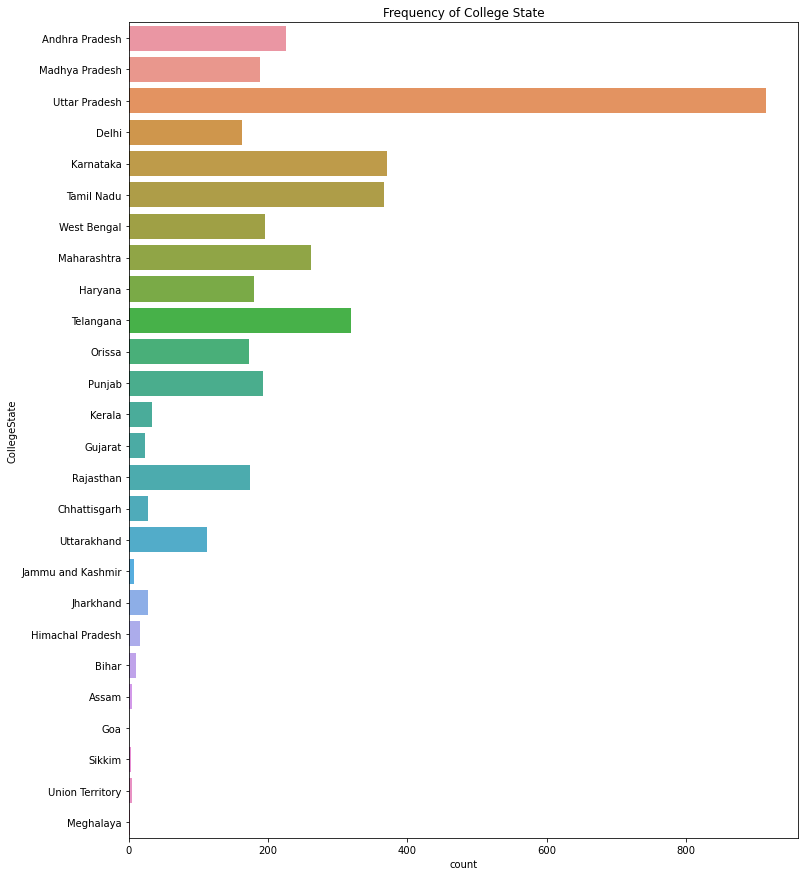

In [85]:
plt.figure(figsize = (12, 15))
sns.countplot(y = df.CollegeState)
plt.title('Frequency of College State')
plt.show()

#### Most of the colleges are from Uttar Pradesh
#### While the least colleges are from Meghalaya, Sikkim & Goa

In [86]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Service_Period', 'Age'],
      dtype='object')

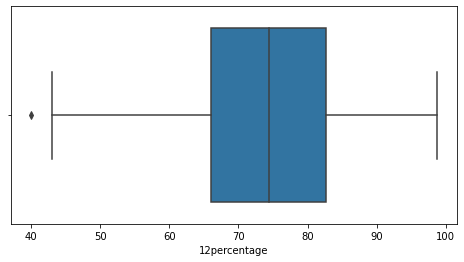

In [87]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = df['12percentage'])
plt.show()

#### Mean value of 12th percentage is 74%

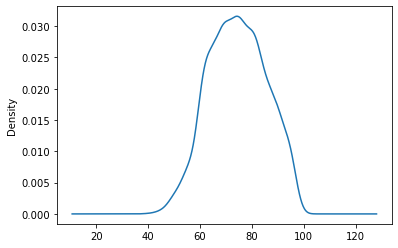

In [88]:
df['12percentage'].plot(kind = 'kde')
plt.show()

#### 12th Percentage follows normal distribution

In [89]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Service_Period', 'Age'],
      dtype='object')

### Degree

In [90]:
df.Degree.value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

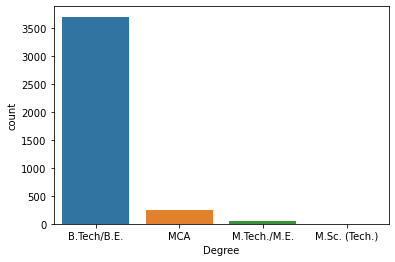

In [91]:
sns.countplot(x = df['Degree'])
plt.show()

#### Most popular degree is B.Tech/B.E.

# Bi-Variate Analysis

In [92]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Service_Period', 'Age'],
      dtype='object')

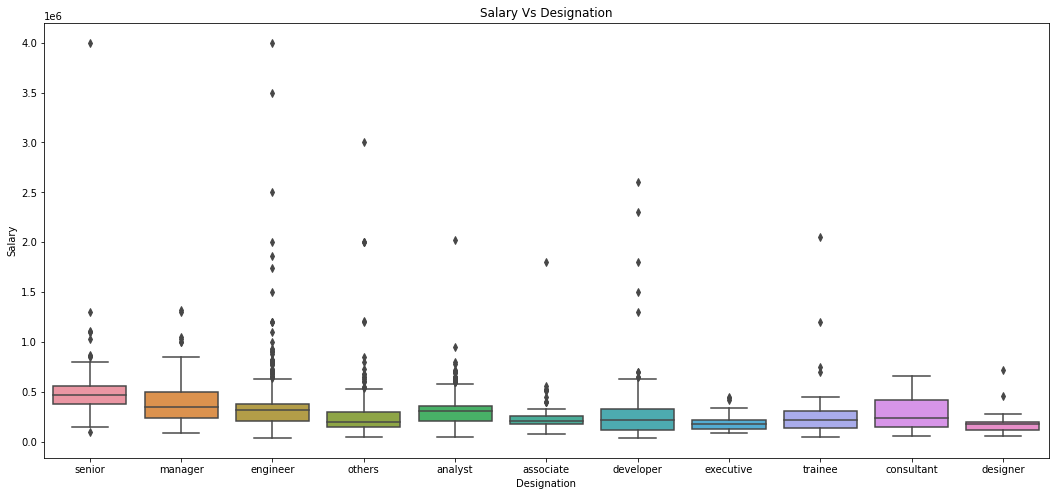

In [93]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = df.Designation, y =  df.Salary)
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.title('Salary Vs Designation')
plt.show()

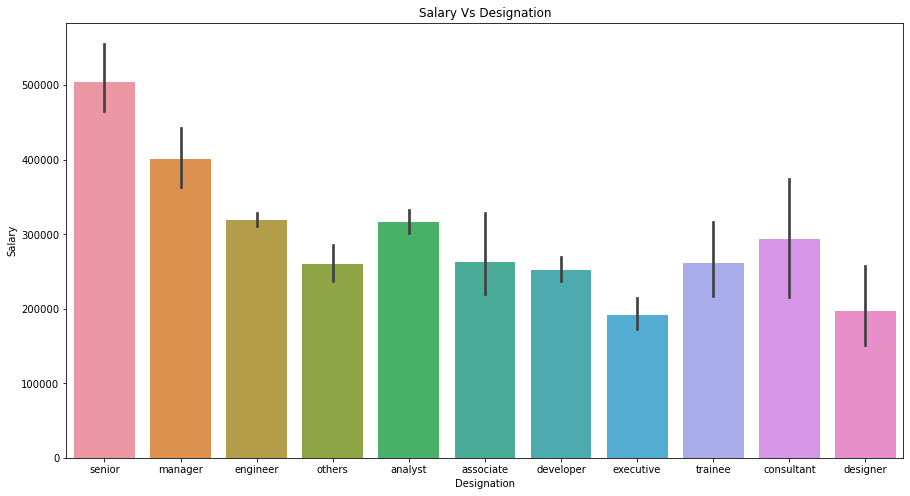

In [94]:
plt.figure(figsize = (15, 8))
sns.barplot(y = df.Salary, x = df.Designation)
plt.title('Salary Vs Designation')
plt.show()

#### The senior most position gets the highest salary followed by manager.

### Salary Vs Gender

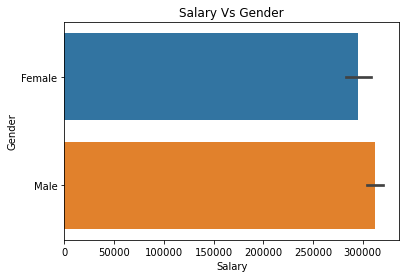

In [95]:
sns.barplot(x = df.Salary, y = df.Gender)
plt.title('Salary Vs Gender')
plt.show()

#### Males are being paid more than females

### College Tier Vs Salary

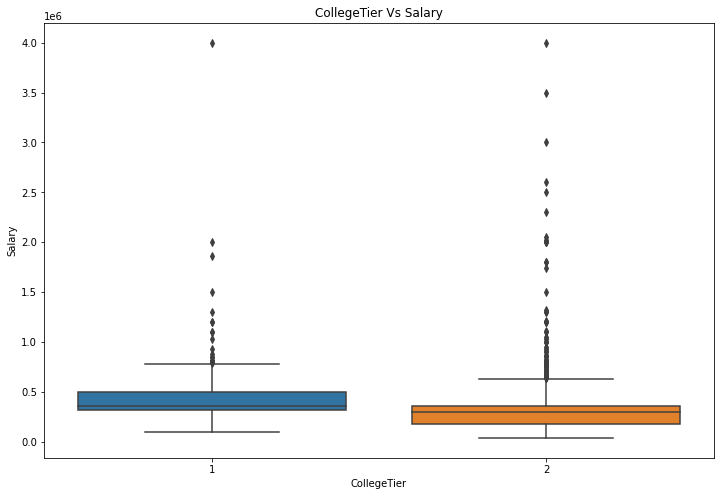

In [96]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = df.CollegeTier, y= df.Salary)
plt.title("CollegeTier Vs Salary")
plt.show()

#### People from tier 1 colleges get more salary which is quite obvious

### Degree Vs Salary

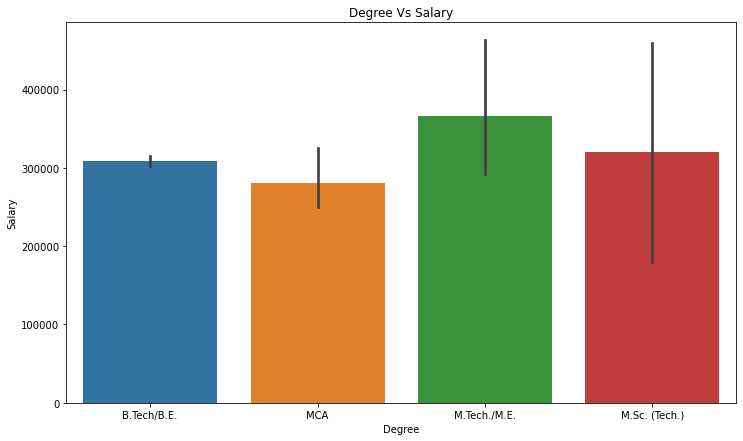

In [97]:
plt.figure(figsize = (12, 7))
sns.barplot(x = df.Degree, y = df.Salary)
plt.title('Degree Vs Salary')
plt.show()

#### M.Tech./M.E. graduates have higher salary than rest of degrees

In [98]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [99]:
threshold = 100
counts = df['Specialization'].value_counts()
df['Specialization'] = df['Specialization'].apply(lambda x: 'Other' if counts[x] < threshold else x)
df['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
5       electronics and communication engineering
6                  computer science & engineering
7                          mechanical engineering
8          electronics and electrical engineering
9       electronics and communication engineering
10                           computer engineering
11                         information technology
12               electronics & telecommunications
13      electronics and communication engineering
14                                          Other
15                         information technology
16      electronics and communication engineering
17                           computer application
18                 computer science & engineering
19                           computer engineering


### Specialization Vs Salary

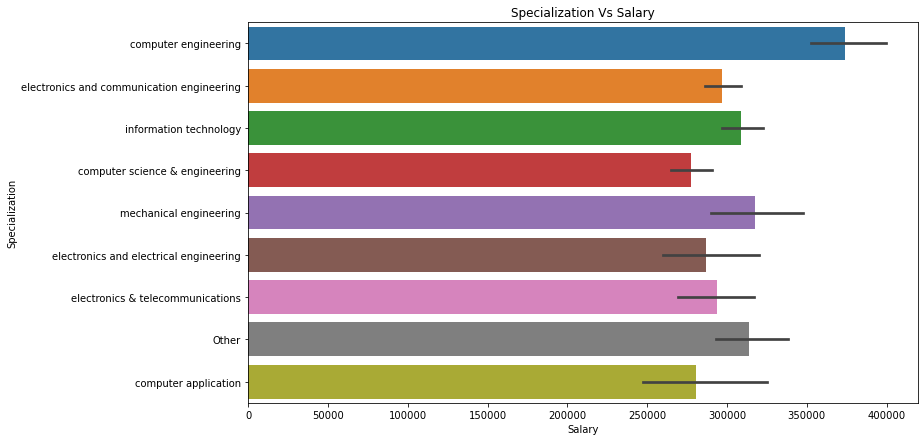

In [100]:
plt.figure(figsize = (12, 7))
sns.barplot(y = df.Specialization, x = df.Salary)
plt.title('Specialization Vs Salary')
plt.show()

#### Computer Engineering graduates get higher salary when compared to their counter-parts

### GPA Vs Salary

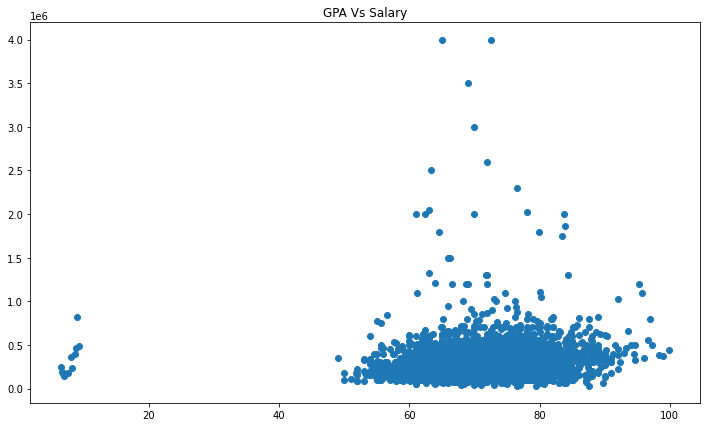

In [101]:
plt.figure(figsize = (12, 7))
plt.scatter(x = df.collegeGPA, y = df.Salary)
plt.title('GPA Vs Salary')
plt.show()

#### There is no correlation b/w GPA in college and Salary

In [102]:
sample = df[['Salary', 'Designation', 'Gender', '10percentage', '12percentage', '12board', 'openess_to_experience', 
             'Service_Period', 'Age']]

### HeatMap in sample dataframe

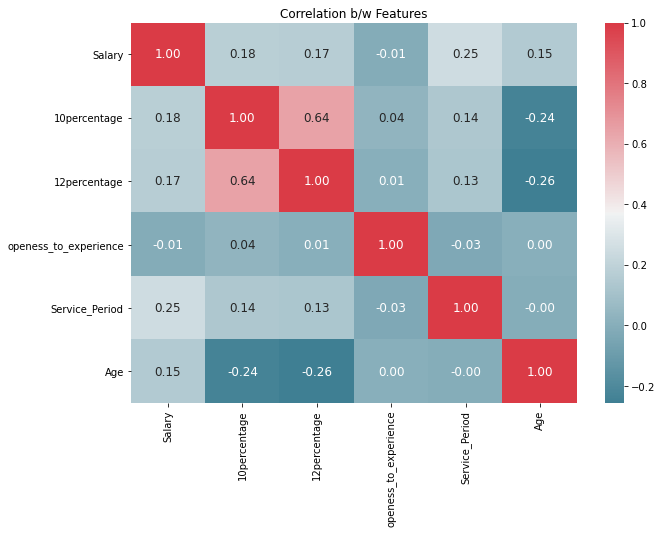

In [103]:
corr_matrix = sample.corr()
plt.figure(figsize = (10, 7))
plt.title('Correlation b/w Features')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap = cmap, annot = True, fmt = '.2f', annot_kws = {'fontsize': 12})
plt.show()

#### Salary is having strong correlation b/w all columns
#### There are some columns that posess negative correlation i.e. openess_to_experience and Service_Period

### Salary Vs Graduation Year

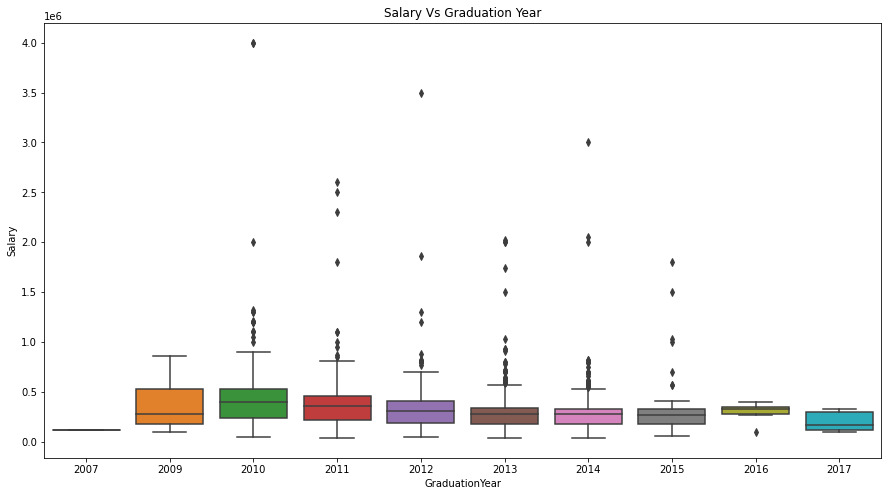

In [104]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df.Salary, x = df.GraduationYear)
plt.title('Salary Vs Graduation Year')
plt.show()

#### 2010 graduates are more likely to have higher salary

### Designation Vs Service Period

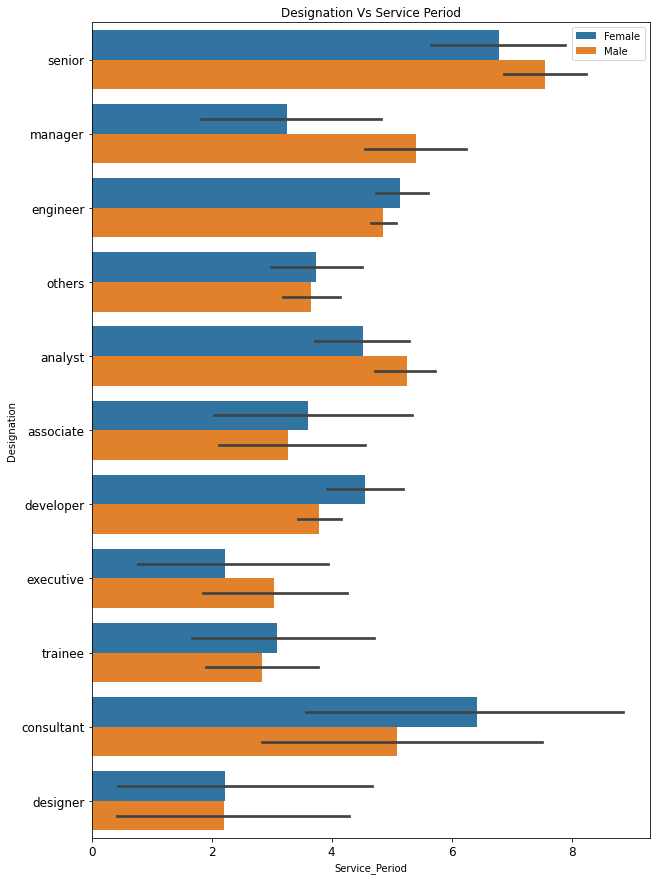

In [105]:
plt.figure(figsize = (10, 15))
sns.barplot(y = df.Designation, x = df.Service_Period, hue = df.Gender)
plt.legend()
plt.title('Designation Vs Service Period')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

#### Senior most position people work for a longer period of time which is quite obvious where male candidates are more in number

# Research Question
### Times of India article dated Jan 18, 2019 states that
#### “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

#### Is there a relationship between gender and specialisation?

In [106]:
new_data = df[(df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) & (df["Service_Period"] == 0)]

p_value = st.ttest_1samp(new_data['Salary'], popmean = 250000)[1]

# For 95% confidence interval

if p_value < 0.05:
    print('We reject the null hypothesis, Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis, Avergae salary is equal to 250k')

We fail to reject null hypothesis, Avergae salary is equal to 250k


C:\Users\harsh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\harsh\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\harsh\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\harsh\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\harsh\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


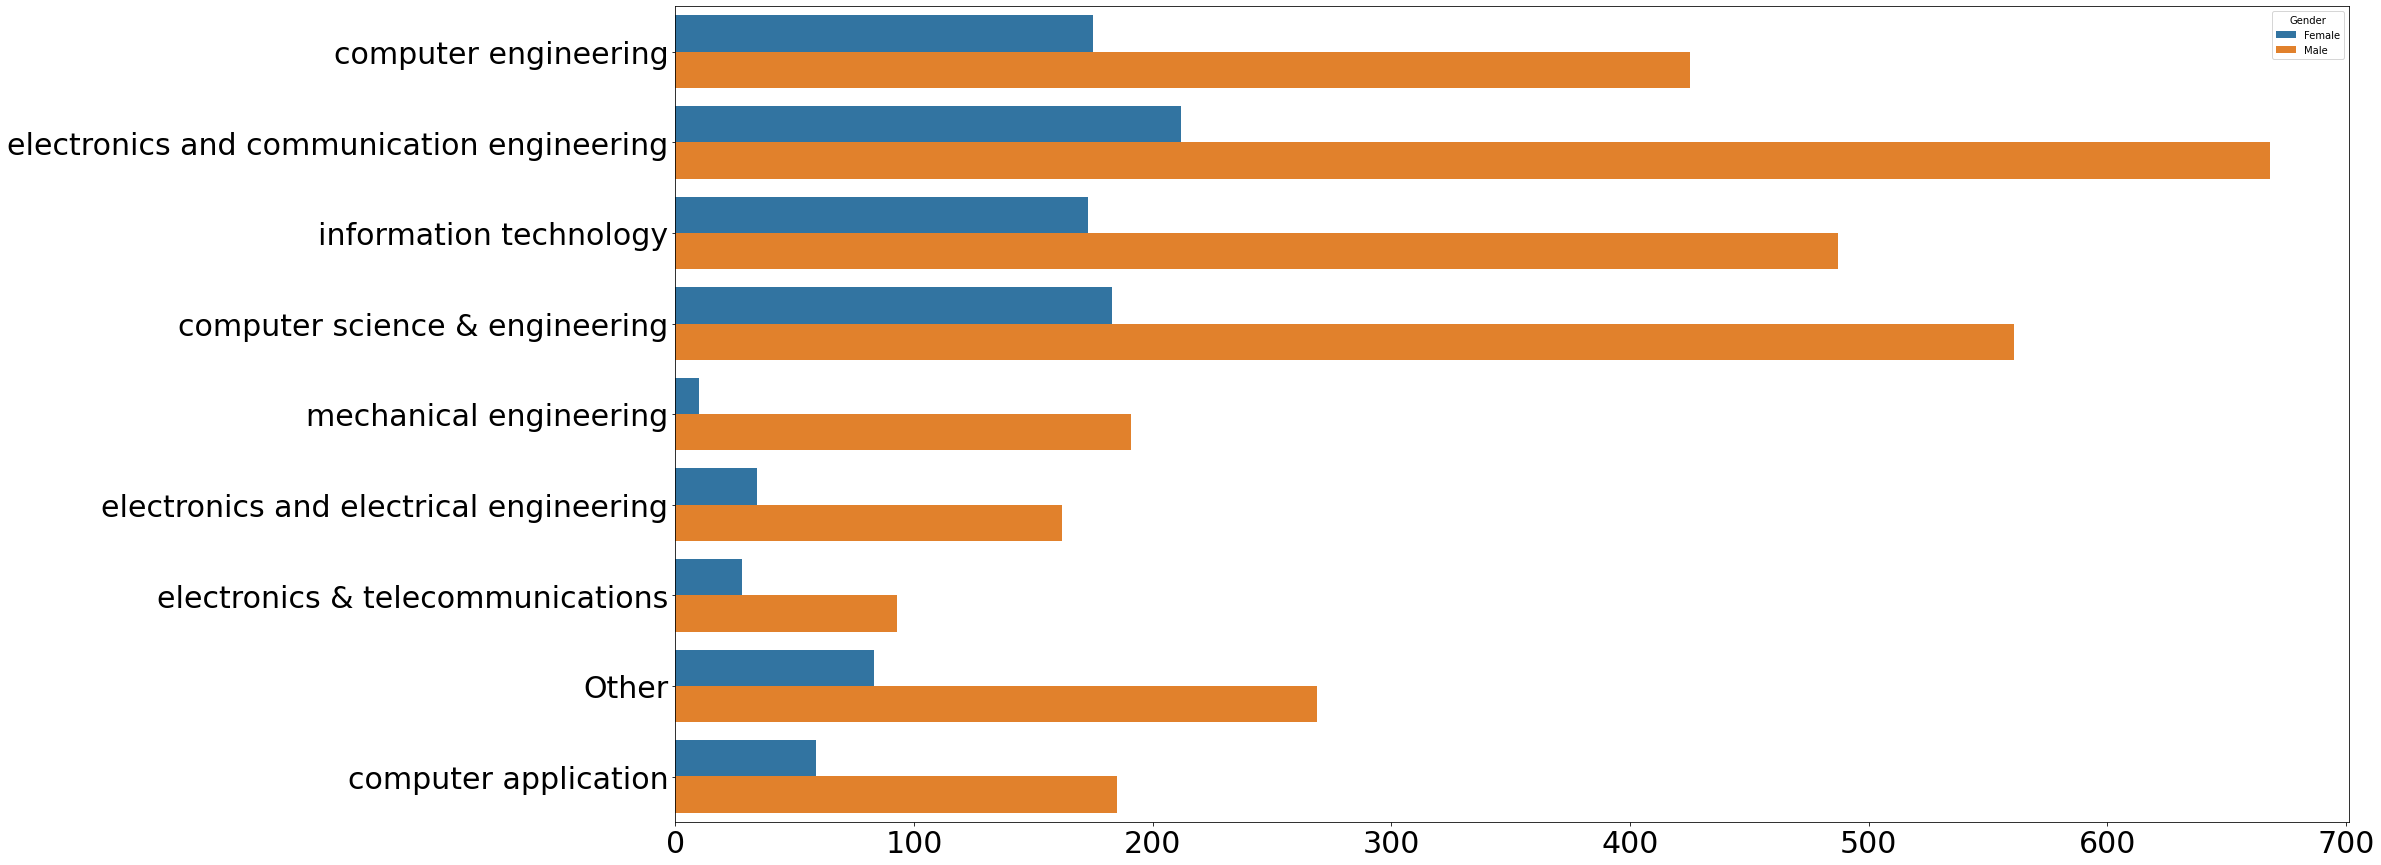

In [107]:
plt.figure(figsize = (30, 15))
sns.countplot(y = df.Specialization, hue = df.Gender)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

#### There is no relationship b/w Gender & Specialization